In [1]:
import numpy as np
import pandas as pd
import folium, html, json
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('../data/brazil_corona19_data.csv')
df['date'] = df['date'].astype('datetime64[ns]')


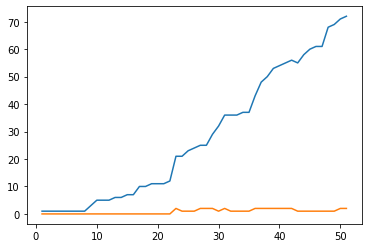

In [3]:
df = df[df['city']=='Ivinhema']
plt.plot(df.day,df.cases)
plt.plot(df.day,df.avg7_cases)
# plt.plot(df.day,df.deaths)

In [4]:
df.tail()

,date,state,city,place_type,cases,deaths,day,is_last,population,city_ibge_code,...,var_death_day,cases_thousand,deaths_thousand,case_day_thousand,death_day_thousand,avg7_cases,avg7_deaths,avg7_perc_death,avg7_case_day_thousand,avg7_death_day_thousand
141406,2020-07-12,MS,Ivinhema,city,61,0,47,False,23187,5004700,...,0.0,2.631,0.000,0.000,0.000,1,0,0.00,0.043,0.000
141407,2020-07-13,MS,Ivinhema,city,68,1,48,False,23187,5004700,...,1.0,2.933,0.043,0.302,0.043,1,0,0.21,0.080,0.006
141408,2020-07-14,MS,Ivinhema,city,69,1,49,False,23187,5004700,...,-1.0,2.976,0.043,0.043,0.000,1,0,0.42,0.080,0.006
141409,2020-07-15,MS,Ivinhema,city,71,1,50,False,23187,5004700,...,0.0,3.062,0.043,0.086,0.000,2,0,0.62,0.099,0.006
141410,2020-07-16,MS,Ivinhema,city,72,1,51,True,23187,5004700,...,0.0,3.105,0.043,0.043,0.000,2,0,0.82,0.086,0.006


In [5]:
df = pd.read_csv('../data/world_corona19_data.csv', sep=',')
df['date'] = df['date'].astype('datetime64[ns]')


In [6]:
df = df[df['country']=='Brazil']
df.tail()

,country,date,cases,deaths,recoveries,day,case_day,death_day,recovery_day,%var_case_day,...,recovery_day_million,avg7_cases,avg7_deaths,avg7_recoveries,avg7_case_day_million,avg7_death_day_million,avg7_recovery_day_million,perc_death,perc_recovery,active_cases
3050,Brazil,2020-07-14,1926824,74133,1323425,140,41857.0,1300,32174,106.33,...,152.4,36890.0,1056.0,30916.0,174.786,5.029,146.471,3.85,68.68,529266
3051,Brazil,2020-07-15,1966748,75366,1350098,141,39924.0,1233,26673,-4.62,...,126.4,36226.0,1057.0,30036.0,171.643,5.029,142.300,3.83,68.65,541284
3052,Brazil,2020-07-16,2012151,76688,1397531,142,45403.0,1322,47433,13.72,...,224.7,36624.0,1072.0,32297.0,173.529,5.100,153.014,3.81,69.45,537932
3053,Brazil,2020-07-17,2046328,77851,1428520,143,34177.0,1163,30989,-24.73,...,146.8,35071.0,1064.0,30165.0,166.171,5.057,142.900,3.80,69.81,539957
3054,Brazil,2020-07-18,2074860,78772,1447408,144,28532.0,921,18888,-16.52,...,89.5,33572.0,1043.0,29045.0,159.071,4.957,137.600,3.80,69.76,548680


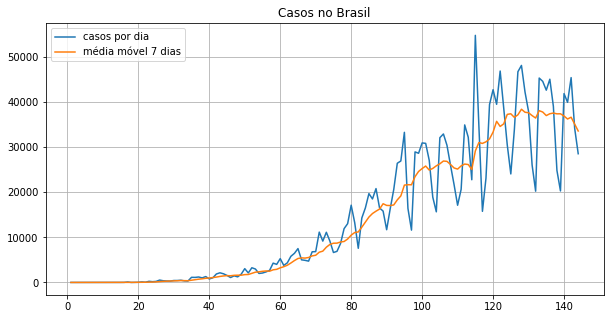

In [9]:
plt.figure(figsize=(10,5))
plt.title('Casos no Brasil')
plt.plot(df.day,df.case_day, label='casos por dia')
plt.plot(df.day,df.avg7_cases, label='média móvel 7 dias')
plt.grid()

plt.legend()

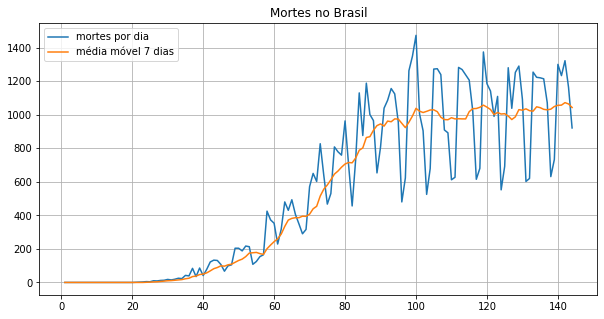

In [10]:
plt.figure(figsize=(10,5))
plt.title('Mortes no Brasil')
plt.plot(df.day,df.death_day, label='mortes por dia')
plt.plot(df.day,df.avg7_deaths, label='média móvel 7 dias')
plt.grid()
plt.legend()

In [12]:
df = pd.read_csv('../data/brazil_corona19_data.csv')
df['date'] = df['date'].astype('datetime64[ns]')

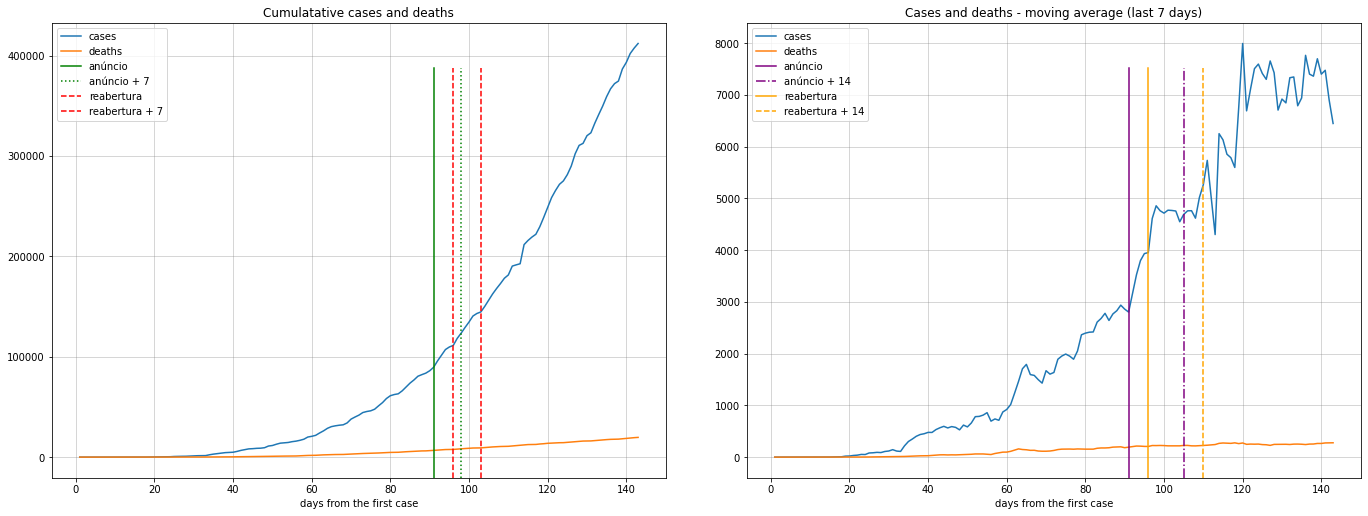

In [30]:

# Selected cities
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20, 8))
fig.tight_layout(pad=5.0)

ax1.set_title("Cumulatative cases and deaths")
ax1.set_xlabel("days from the first case")
ax1.grid(color='gray', alpha = 0.4)

ax2.set_title("Cases and deaths - moving average (last 7 days)")
ax2.set_xlabel("days from the first case")
ax2.grid(color='gray', alpha = 0.4)

dados = df[(df['state'] == 'SP') & (df['place_type']=='state')]

ax1.plot(dados.day, dados.cases, label = 'cases')
ax1.plot(dados.day, dados.deaths, label = 'deaths')
ax2.plot(dados.day, dados.avg7_cases, label = 'cases')
ax2.plot(dados.day, dados.avg7_deaths, label = 'deaths')

ax1.axvline(x=91, ymin=0, ymax=0.9, color = 'green', linestyle = '-',label = 'anúncio')
ax1.axvline(x=91+7, ymin=0, ymax=0.9, color = 'green', linestyle = ':',label = 'anúncio + 7')
ax1.axvline(x=96, ymin=0, ymax=0.9, color = 'red', linestyle = '--',label = 'reabertura')
ax1.axvline(x=96+7, ymin=0, ymax=0.9, color = 'red', linestyle = '--',label = 'reabertura + 7')

ax2.axvline(x=91, ymin=0, ymax=0.9, color = 'purple', linestyle = '-',label = 'anúncio')
ax2.axvline(x=91+14, ymin=0, ymax=0.9, color = 'purple', linestyle = '-.',label = 'anúncio + 14')
ax2.axvline(x=96, ymin=0, ymax=0.9, color = 'orange', linestyle = '-',label = 'reabertura')
ax2.axvline(x=96+14, ymin=0, ymax=0.9, color = 'orange', linestyle = '--',label = 'reabertura + 14')

ax1.legend()
ax2.legend()
# fig.savefig('../analysis/saoPaulo_cases_deaths.png')